# Kotitalouksien nettovarallisuus ja varallisuusvero

Yritän tässä selvittää seuraavaa:

* Miten kotitalouksien nettovarallisuus on jakautunut Suomessa?
* Millaisia verokertymiä voitaisiin saada nettovarallisuuteen kohdistuvalla verolla?

Taustalla on tutkia pääomatuloveron, perintö- ja lahjaveron sekä varainsiirtoveron korvaamista varallisuusverolla.

## Nettovarallisuuden jakautuminen

Tilastokeskuksella on vuoteen 2019 asti tietoja kotitalouksien varallisuudesta, esim. [136z - Kotitalouksien varat, velat ja tulot nettovarallisuuskymmenyksen mukaan](https://pxdata.stat.fi/PxWeb/pxweb/fi/StatFin/StatFin__vtutk/statfin_vtutk_pxt_136z.px). Tilastossa ilmoitetaan periaatteessa vain desiilittäiset tunnusluvut (keskiarvo, mediaani ja kvartiilit), joten jakauman yksityiskohdat tulee estimoida. Käytän tässä paloittain lineaarista estimaattia nettovarallisuudelle kotitalouden järjestysluvun funktiona (pienimmästä varallisuudesta suurimpaan).

Aivan ajantasaista tietoa ei tilastokeskuksella ole. EKP:llä olisi [kokeellista varallisuustilastoa](https://data.ecb.europa.eu/data/datasets/DWA/data-information), joka ulottuu vuoteen 2023. Tätä olisi mahdollista käyttää auttavasti korjaamaan estimaatti nykypäivään. Täysin ongelmatonta se ei ole, sillä EKP:n ja tilastokeskuksen datat poikkeavat vuoden 2019 osalta.

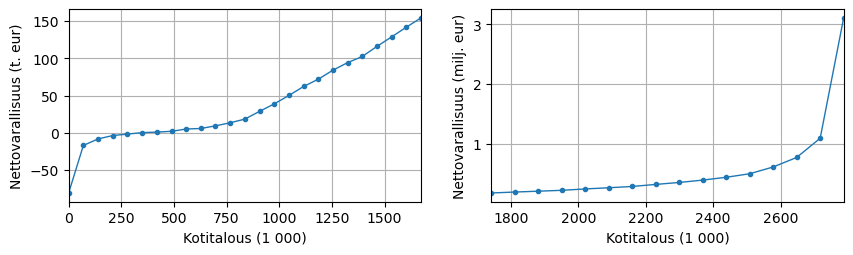

Kotitalouksia yhteensä:                 2,787,200
Nettovarallisuuden keskiarvo:             214,802
Nettovarallisuus yhteensä:                599 mrd.
Nettovarallisuus yhteensä, ≥ 0:           604 mrd.
Nettovarallisuus yhteensä, ≥ 100 000:     427 mrd.
Nettovarallisuus yhteensä, ≥ 500 000:     158 mrd.
Nettovarallisuus yhteensä, ≥ 1 000 000:    80 mrd.


In [1]:
from matplotlib import pyplot as plt
import fi_household_wealth_2019 as fihw

stats = fihw.WealthStats()

fig, axs = plt.subplots(1, 2, figsize = (10, 2.5))
fihw.plot_wealth_stats(axs, stats)
plt.savefig("nettovarallisuus.png")
plt.show()

fihw.report_wealth_stats(stats)

Nettovarallisuus $\geq 0$ on suurempi kuin kokonaisnettovarallisuus, sillä siihen eivät sisälly nettovelkaiset kotitaloudet.

Silmämääräisesti jakauman "sisemmät" eli muut kuin aivan ensimmäinen ja aivan viimeinen segmentti vaikuttavat varsin hyväkäytöksisiltä, ja niiden perusteella laskeminen tuskin menee pahasti pieleen. Ensimmäinen ja viimeinen segmentti ovat selkeästi poikkeavia, ja myös tilastollinen intuitio (sekä yleinen tietoisuus ääritapausten olemassaolosta) sanoo, ettei niitä tulisi sovittaa lineaarisesti vaan esimerkiksi eksponenttifunktiolla.

Kuitenkin varallisuusveron kertymän laskemista ajatellen tällä virheellä ei ole juuri merkitystä, jos kaikki progressioportaat säädetään "sisempien" segmenttien alueelle.

## Varallisuusveron tuotto

Jakauman pohjalta voidaan laskea progressiivisen varallisuusveron tuottoa eri konfiguraatioissa.

Vertailun vuoksi vuoden 2024 arvioitu kertymä on:

* pääomatuloverosta 3.81 mrd.;
* perintö- ja lahjaverosta 817 milj.; ja
* varainsiirtoverosta 698 milj.

Yhteensä nämä ovat 5.33 mrd. Jotta varallisuusvero voisi kestävästi korvata nuo verot, sen tulisi saavuttaa vähintään tuon suuruinen kertymä.

### Tasavero

Varallisuuden tasavero tuskin on tarkoituksenmukainen juuri missään tilanteessa, mutta esitän sen tässä vertailun vuoksi eri alarajoilla.

In [2]:
for alaraja in (0, 50_000, 100_000):
    tax = fihw.TaxBrackets()
    tax.add(1.00, alaraja)
    tax.compute(stats)
    fihw.report_wealth_tax(tax)

--------------------------------------------------------
  alaraja ..   yläraja  vero      kertymä      veropohja
--------------------------------------------------------
        0 ..            1.00%    6.04 mrd.    603.63 mrd.
Yhteensä: 6.04 mrd.
--------------------------------------------------------
  alaraja ..   yläraja  vero      kertymä      veropohja
--------------------------------------------------------
   50,000 ..            1.00%    5.06 mrd.    506.22 mrd.
Yhteensä: 5.06 mrd.
--------------------------------------------------------
  alaraja ..   yläraja  vero      kertymä      veropohja
--------------------------------------------------------
  100,000 ..            1.00%    4.27 mrd.    426.98 mrd.
Yhteensä: 4.27 mrd.


### Kiinteistöverosta ammentava

Tässä on valittu prosentit karkeasti [kiinteistöveron rajoja](https://www.vero.fi/henkiloasiakkaat/asuminen/kiinteistovero/nain-vero-muodostuu/) vastaavaksi:

* Vakituisen asuinrakennuksen veroprosentti on 0,41 - 1,00%.
* Rakennusten yleinen veroprosentti on 0,93 - 2,00%.
* Rakentamattoman rakennuspaikan veroprosentti on 2,00 - 6,00%.

Logiikkana on rinnastaa varallisuuksien suuruusluokat näihin funktioihin. 230 000 euroa on ASP-lainan enimmäismäärä Helsingissä.

In [3]:
for r1, r2, r3 in ((0.41, 0.93, 2.00), (1.00, 2.00, 2.00), (1.00, 2.00, 2.50), (1.00, 2.00, 3.00)):
    tax = fihw.TaxBrackets()
    tax.add(r1, 100_000)
    tax.add(r2, 230_000)
    if r3 > r2:
        tax.add(r3, 460_000)
    tax.compute(stats)
    fihw.report_wealth_tax(tax)

--------------------------------------------------------
  alaraja ..   yläraja  vero      kertymä      veropohja
--------------------------------------------------------
  100,000 ..   230,000  0.41%    0.57 mrd.    140.02 mrd.
  230,000 ..   460,000  0.93%    1.09 mrd.    117.15 mrd.
  460,000 ..            2.00%    3.40 mrd.    169.81 mrd.
Yhteensä: 5.06 mrd.
--------------------------------------------------------
  alaraja ..   yläraja  vero      kertymä      veropohja
--------------------------------------------------------
  100,000 ..   230,000  1.00%    1.40 mrd.    140.02 mrd.
  230,000 ..            2.00%    5.74 mrd.    286.96 mrd.
Yhteensä: 7.14 mrd.
--------------------------------------------------------
  alaraja ..   yläraja  vero      kertymä      veropohja
--------------------------------------------------------
  100,000 ..   230,000  1.00%    1.40 mrd.    140.02 mrd.
  230,000 ..   460,000  2.00%    2.34 mrd.    117.15 mrd.
  460,000 ..            2.50%    4.25 mrd